In [1]:
%matplotlib inline
from sklearn import tree
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split 

In [2]:
wine = load_wine()
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [3]:
# 特征
wine.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [4]:
# 标签(三分类)
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [5]:
# 13 个特征
wine.data.shape

(178, 13)

In [6]:
# 字典转换成表
import pandas as pd
pd.concat([pd.DataFrame(wine.data), pd.DataFrame(wine.target)], axis=1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,0
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [7]:
# 特征的名字
# 建树时候如果不提供特征名字，则会用特征索引代替
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [8]:
# 标签名字
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [9]:
# 将数据分成训练集和测试集
XTrain, XTest, YTrain, YTest = train_test_split(wine.data, wine.target, test_size=0.3)

In [10]:
print(XTrain.shape)
print(YTrain.shape)
YTrain.squeeze()
print(YTrain.shape)

(124, 13)
(124,)
(124,)


In [11]:
XTest.shape

(54, 13)

In [12]:
# 建模三部曲1
clf = tree.DecisionTreeClassifier(criterion="entropy")
clf = clf.fit(XTrain, YTrain)
score = clf.score(XTest, YTest)

In [13]:
print(score)

0.8888888888888888


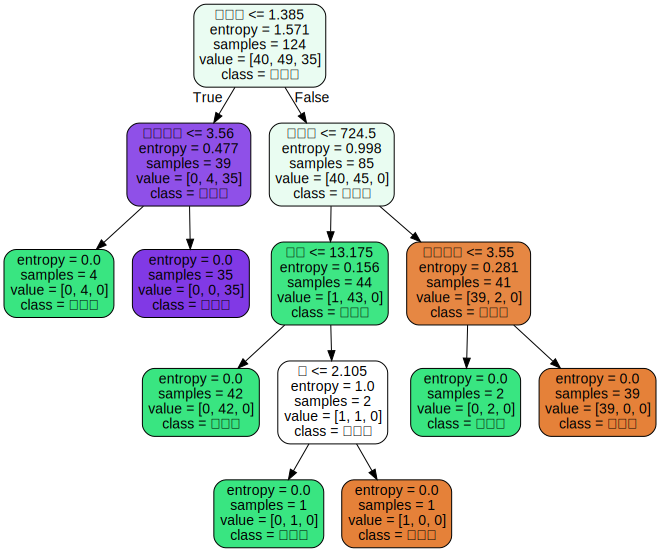

In [14]:
# 将树画出来
import graphviz
feature_names = ['酒精', '苹果酸', '灰', '灰的碱性', '镁', '总酚', '类黄酮', '非黄烷类酚类', '花青素', '颜色强度', '色调', 'od280/od315稀释葡萄酒', '脯氨酸']
dot_data = tree.export_graphviz(clf
                                ,feature_names=feature_names
                                ,class_names=["第一类", "第二类", "第三类"]
                                ,filled=True
                                ,rounded=True
                                )
graph = graphviz.Source(dot_data)
graph

In [15]:
# 特征的重要性
clf.feature_importances_

array([0.02508043, 0.        , 0.01026707, 0.        , 0.        ,
       0.        , 0.46922583, 0.        , 0.        , 0.15469768,
       0.        , 0.        , 0.34072898])

In [16]:
# 特征的重要性
[*zip(clf.feature_importances_)]

[(0.02508043479477153,),
 (0.0,),
 (0.010267070595943267,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.46922583159886455,),
 (0.0,),
 (0.0,),
 (0.15469768267666437,),
 (0.0,),
 (0.0,),
 (0.3407289803337563,)]

### 设置随机种子 `random_state`，使得结果可复现

In [17]:
# 设置随机数种子random_state之后，每次的结果都一样了(会一直长出同一棵树)
clf1 = tree.DecisionTreeClassifier(criterion="entropy", random_state=20)
clf1 = clf1.fit(XTrain, YTrain)
score = clf1.score(XTest, YTest)
print(score)

0.8888888888888888


### 控制随机性的参数 splitter
- best 在分支时优先选择更重要的特征
- random 更随机，降低过拟合

In [18]:
# splitter 也是控制随机性的，best 在分支时优先选择更重要的特征；random 更随机，降低过拟合
clf2 = tree.DecisionTreeClassifier(criterion="entropy"
                                  ,random_state=20
                                  ,splitter="random"
                                 )
clf2 = clf2.fit(XTrain, YTrain)
score = clf2.score(XTest, YTest)
score

0.9444444444444444

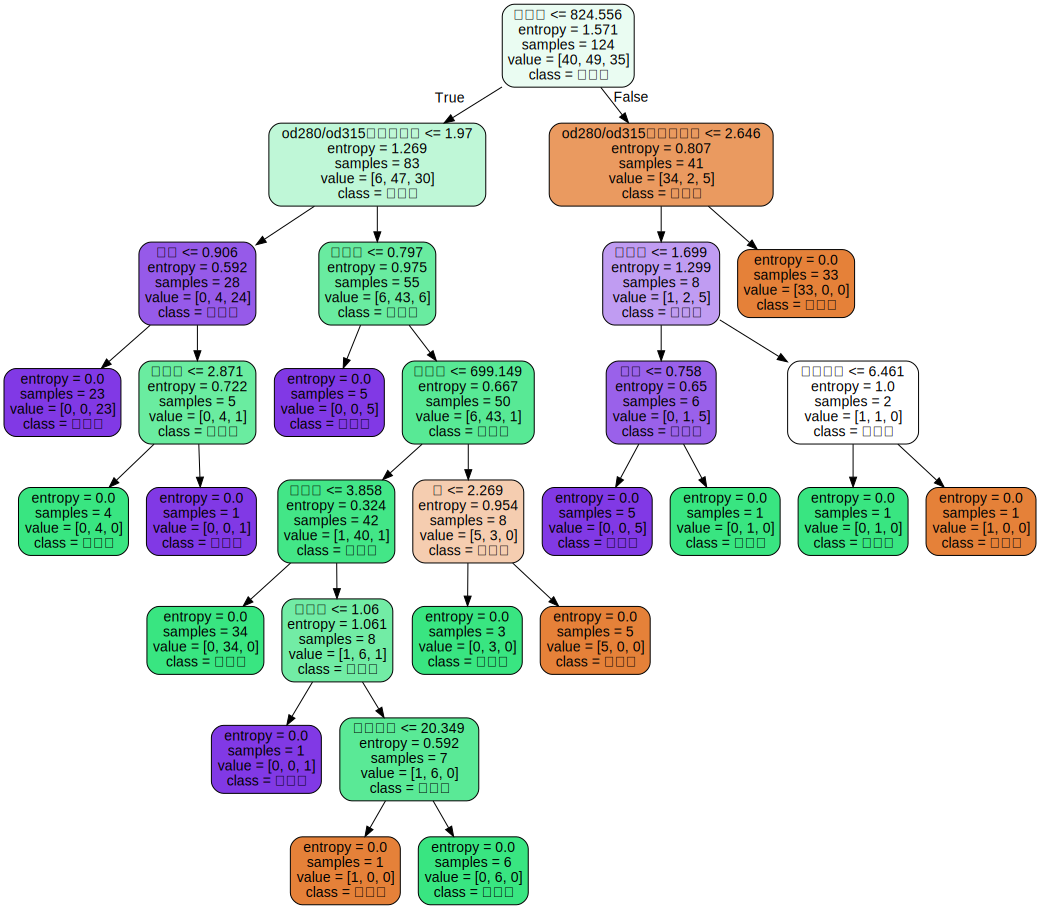

In [19]:
# 加了随机之后，将变宽变深了
import graphviz
feature_names = ['酒精', '苹果酸', '灰', '灰的碱性', '镁', '总酚', '类黄酮', '非黄烷类酚类', '花青素', '颜色强度', '色调', 'od280/od315稀释葡萄酒', '脯氨酸']
dot_data = tree.export_graphviz(clf2
                                ,feature_names=feature_names
                                ,class_names=["第一类", "第二类", "第三类"]
                                ,filled=True
                                ,rounded=True
                                )
graph = graphviz.Source(dot_data)
graph

In [20]:
# 对训练集的拟合程度
score_train = clf2.score(XTrain, YTrain)
print(score_train)

1.0


### 剪枝参数
- `max_depth`
- `min_samples_leat`
- `min_samples_split`

In [21]:
# 剪枝参数
clf3 = tree.DecisionTreeClassifier(criterion="entropy"
                                  ,random_state=20
                                  ,splitter="random"
                                  ,max_depth=3
                                  #,min_samples_leaf=10
                                  #,min_samples_split=10
                                 )
clf3 = clf3.fit(XTrain, YTrain)
score = clf3.score(XTest, YTest)
score

1.0

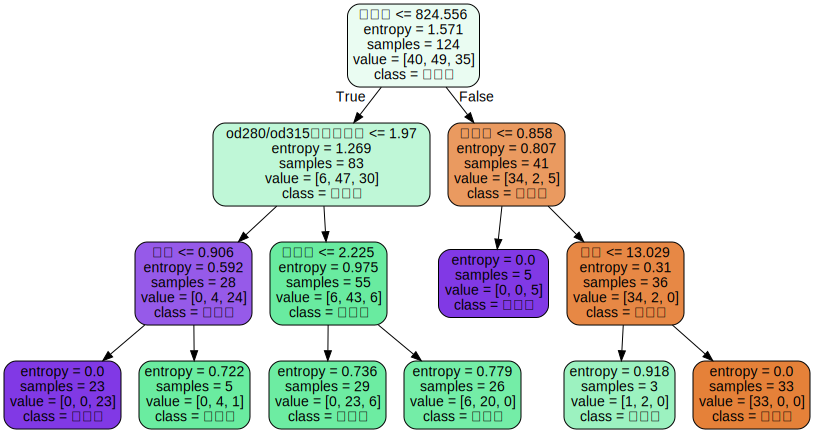

In [22]:
import graphviz
feature_names = ['酒精', '苹果酸', '灰', '灰的碱性', '镁', '总酚', '类黄酮', '非黄烷类酚类', '花青素', '颜色强度', '色调', 'od280/od315稀释葡萄酒', '脯氨酸']
dot_data = tree.export_graphviz(clf3
                                ,feature_names=feature_names
                                ,class_names=["第一类", "第二类", "第三类"]
                                ,filled=True
                                ,rounded=True
                                )
graph = graphviz.Source(dot_data)
graph

### 调参 -- 确认最优剪枝参数

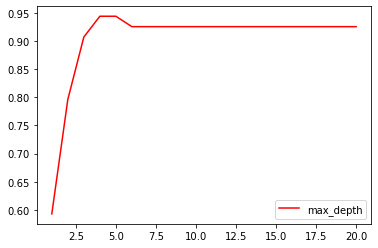

In [23]:
# 确认最优剪枝参数
import matplotlib.pyplot as plt

test = []
for i in range(20):
    clf = tree.DecisionTreeClassifier(max_depth=i+1
                                      ,criterion="entropy"
                                      ,random_state=30
                                      ,splitter="random"
                                     )
    clf = clf.fit(XTrain, YTrain)
    score = clf.score(XTest, YTest)
    test.append(score)


plt.plot(range(1, 21), test, color="red", label="max_depth")
plt.legend()
plt.show()

In [8]:
from sklearn import ensemble

In [10]:
clf = ensemble.E

AttributeError: module 'sklearn.ensemble' has no attribute 'ExtRaTreesClassfier'